In [40]:
import pandas as pd    # Importing pandas for data manipulation
import numpy as np     # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns    # Importing seaborn for statistical data visualization
import plotly.express as px     # Importing plotly for interactive visualizations
import streamlit as st   # Importing streamlit for building dashboards


In [41]:
from sklearn.preprocessing import  OneHotEncoder

In [42]:
youtube_df=pd.read_csv("C:/Users/KIRUBA/OneDrive/Desktop/youtube/youtube_ad_revenue_dataset (1).csv")

In [43]:
youtube_df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [44]:
youtube_df.tail(5)

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811
122399,vid_1056,2024-06-25 10:50:40.993199,9931,770.0,NaN,38466.837135,27.305703,517587,Tech,TV,CA,253.842824


In [45]:
youtube_df.shape

(122400, 12)

In [46]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [47]:
youtube_df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [48]:
youtube_df.duplicated().sum()

np.int64(2400)

In [49]:
youtube_df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


# EDA (Explotary Data Analysis)

###video_id

In [50]:
youtube_df.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd'],
      dtype='object')

In [51]:
print(youtube_df.columns.tolist())


['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category', 'device', 'country', 'ad_revenue_usd']


In [52]:
print("shape = ",youtube_df["video_id"].shape)
print("\ninfo = ",youtube_df["video_id"].info())
print("\nisnull = ",youtube_df["video_id"].isnull().sum())
print("\ndescribe = ", youtube_df["video_id"].describe())
print("\nnunique =",youtube_df["video_id"].nunique())
print("\nunique =",youtube_df["video_id"].unique())
print("\nvalue_counts =",youtube_df['video_id'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: video_id
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count       122400
unique        5000
top       vid_3033
freq            47
Name: video_id, dtype: object

nunique = 5000

unique = ['vid_3092' 'vid_3459' 'vid_4784' ... 'vid_4757' 'vid_3953' 'vid_2224']

value_counts = video_id
vid_3033    47
vid_1725    43
vid_2512    43
vid_4483    42
vid_4840    42
            ..
vid_2214    11
vid_3001    11
vid_981     11
vid_3847    11
vid_1629    10
Name: count, Length: 5000, dtype: int64


### category

In [53]:
print("shape = ",youtube_df["category"].shape)
print("\ninfo = ",youtube_df["category"].info())
print("\nisnull = ",youtube_df["category"].isnull().sum())
print("\ndescribe = ", youtube_df["category"].describe())
print("\nnunique =",youtube_df["category"].nunique())
print("\nunique =",youtube_df["category"].unique())
print("\nvalue_counts =",youtube_df['category'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: category
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count        122400
unique            6
top       Education
freq          20514
Name: category, dtype: object

nunique = 6

unique = ['Entertainment' 'Gaming' 'Education' 'Music' 'Tech' 'Lifestyle']

value_counts = category
Education        20514
Music            20475
Tech             20444
Entertainment    20411
Gaming           20359
Lifestyle        20197
Name: count, dtype: int64


### device

In [54]:
print("shape = ",youtube_df["device"].shape)
print("\ninfo = ",youtube_df["device"].info())
print("\nisnull = ",youtube_df["device"].isnull().sum())
print("\ndescribe = ", youtube_df["device"].describe())
print("\nnunique =",youtube_df["device"].nunique())
print("\nunique =",youtube_df["device"].unique())
print("\nvalue_counts =",youtube_df['device'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: device
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count     122400
unique         4
top           TV
freq       30646
Name: device, dtype: object

nunique = 4

unique = ['TV' 'Tablet' 'Mobile' 'Desktop']

value_counts = device
TV         30646
Mobile     30598
Tablet     30579
Desktop    30577
Name: count, dtype: int64


### Country

In [55]:
print("shape = ",youtube_df["country"].shape)
print("\ninfo = ",youtube_df["country"].info())
print("\nisnull = ",youtube_df["country"].isnull().sum())
print("\ndescribe = ", youtube_df["country"].describe())
print("\nnunique =",youtube_df["country"].nunique())
print("\nunique =",youtube_df["country"].unique())
print("\nvalue_counts =",youtube_df['country'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: country
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count     122400
unique         6
top           CA
freq       20603
Name: country, dtype: object

nunique = 6

unique = ['IN' 'CA' 'UK' 'US' 'DE' 'AU']

value_counts = country
CA    20603
DE    20582
IN    20564
AU    20313
UK    20269
US    20069
Name: count, dtype: int64


### Date

In [56]:
print("shape = ",youtube_df["date"].shape)
print("\ninfo = ",youtube_df["date"].info())
print("\nisnull = ",youtube_df["date"].isnull().sum())
print("\ndescribe = ", youtube_df["date"].describe())
print("\nnunique =",youtube_df["date"].nunique())
print("\nunique =",youtube_df["date"].unique())
print("\nvalue_counts =",youtube_df['date'].value_counts())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: date
Non-Null Count   Dtype 
--------------   ----- 
122400 non-null  object
dtypes: object(1)
memory usage: 956.4+ KB

info =  None

isnull =  0

describe =  count                         122400
unique                           365
top       2025-04-03 10:50:40.993199
freq                             382
Name: date, dtype: object

nunique = 365

unique = ['2024-09-24 10:50:40.993199' '2024-09-22 10:50:40.993199'
 '2024-11-21 10:50:40.993199' '2025-01-28 10:50:40.993199'
 '2025-04-28 10:50:40.993199' '2025-03-31 10:50:40.993199'
 '2024-12-10 10:50:40.993199' '2025-04-05 10:50:40.993199'
 '2025-02-17 10:50:40.993199' '2025-04-16 10:50:40.993199'
 '2025-01-05 10:50:40.993199' '2025-01-08 10:50:40.993199'
 '2024-06-11 10:50:40.993199' '2025-05-16 10:50:40.993199'
 '2025-02-01 10:50:40.993199' '2025-05-19 10:50:40.993199'
 '2025-03-08 10:50:40.993199' '2025-03-16 10:50:40.993199'
 '2

## views

In [57]:
print("shape = ",youtube_df["views"].shape)
print("\ninfo = ",youtube_df["views"].info())
print("\nisnull = ",youtube_df["views"].isnull().sum())
print("\ndescribe = ", youtube_df["views"].describe())
print("\nnunique =",youtube_df["views"].nunique())
print("\nskew = ",youtube_df['views'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: views
Non-Null Count   Dtype
--------------   -----
122400 non-null  int64
dtypes: int64(1)
memory usage: 956.4 KB

info =  None

isnull =  0

describe =  count    122400.000000
mean       9999.856283
std          99.881260
min        9521.000000
25%        9933.000000
50%       10000.000000
75%       10067.000000
max       10468.000000
Name: views, dtype: float64

nunique = 736

skew =  -0.0027575163145067464


## likes 

In [58]:
print("shape = ",youtube_df["likes"].shape)
print("\ninfo = ",youtube_df["likes"].info())
print("\nisnull = ",youtube_df["likes"].isnull().sum())
print("\ndescribe = ", youtube_df["likes"].describe())
print("\nnunique =",youtube_df["likes"].nunique())
print("\nskew = ",youtube_df['likes'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: likes
Non-Null Count   Dtype  
--------------   -----  
116283 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  6117

describe =  count    116283.000000
mean       1099.633618
std         519.424089
min         195.000000
25%         650.000000
50%        1103.000000
75%        1547.000000
max        2061.000000
Name: likes, dtype: float64

nunique = 1855

skew =  -0.0027579035972128923


### Comments

In [59]:
print("shape = ",youtube_df["comments"].shape)
print("\ninfo = ",youtube_df["comments"].info())
print("\nisnull = ",youtube_df["comments"].isnull().sum())
print("\ndescribe = ", youtube_df["comments"].describe())
print("\nnunique =",youtube_df["comments"].nunique())
print("\nskew = ",youtube_df['comments'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: comments
Non-Null Count   Dtype  
--------------   -----  
116288 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  6112

describe =  count    116288.000000
mean        274.396636
std         129.741739
min          48.000000
25%         162.000000
50%         274.000000
75%         387.000000
max         515.000000
Name: comments, dtype: float64

nunique = 466

skew =  0.007735157212128024


### watch_time_minutes

In [60]:
print("shape = ",youtube_df["watch_time_minutes"].shape)
print("\ninfo = ",youtube_df["watch_time_minutes"].info())
print("\nisnull = ",youtube_df["watch_time_minutes"].isnull().sum())
print("\ndescribe = ", youtube_df["watch_time_minutes"].describe())
print("\nnunique =",youtube_df["watch_time_minutes"].nunique())
print("\nskew = ",youtube_df['watch_time_minutes'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: watch_time_minutes
Non-Null Count   Dtype  
--------------   -----  
116295 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  6105

describe =  count    116295.000000
mean      37543.827721
std       12987.724246
min       14659.105562
25%       26366.320569
50%       37531.990337
75%       48777.782090
max       61557.670089
Name: watch_time_minutes, dtype: float64

nunique = 114000

skew =  0.0009027191329527335


### video_length_minutes

In [61]:
print("shape = ",youtube_df["video_length_minutes"].shape)
print("\ninfo = ",youtube_df["video_length_minutes"].info())
print("\nisnull = ",youtube_df["video_length_minutes"].isnull().sum())
print("\ndescribe = ", youtube_df["video_length_minutes"].describe())
print("\nnunique =",youtube_df["video_length_minutes"].nunique())
print("\nskew = ",youtube_df['video_length_minutes'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: video_length_minutes
Non-Null Count   Dtype  
--------------   -----  
122400 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  0

describe =  count    122400.000000
mean         16.014165
std           8.083790
min           2.000142
25%           9.004695
50%          16.005906
75%          23.021260
max          29.999799
Name: video_length_minutes, dtype: float64

nunique = 120000

skew =  -0.001493059891525512


### Subscribers

In [62]:
print("shape = ",youtube_df["subscribers"].shape)
print("\ninfo = ",youtube_df["subscribers"].info())
print("\nisnull = ",youtube_df["subscribers"].isnull().sum())
print("\ndescribe = ", youtube_df["subscribers"].describe())
print("\nnunique =",youtube_df["subscribers"].nunique())
print("\nskew = ",youtube_df['subscribers'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: subscribers
Non-Null Count   Dtype
--------------   -----
122400 non-null  int64
dtypes: int64(1)
memory usage: 956.4 KB

info =  None

isnull =  0

describe =  count    122400.000000
mean     502191.719902
std      288397.470103
min        1005.000000
25%      252507.500000
50%      503465.500000
75%      752192.000000
max      999997.000000
Name: subscribers, dtype: float64

nunique = 113254

skew =  -0.008933723924753037


### Ad_Revenue_Usd

In [63]:
print("shape = ",youtube_df["ad_revenue_usd"].shape)
print("\ninfo = ",youtube_df["ad_revenue_usd"].info())
print("\nisnull = ",youtube_df["ad_revenue_usd"].isnull().sum())
print("\ndescribe = ", youtube_df["ad_revenue_usd"].describe())
print("\nnunique =",youtube_df["ad_revenue_usd"].nunique())
print("\nskew = ",youtube_df['ad_revenue_usd'].skew())

shape =  (122400,)
<class 'pandas.core.series.Series'>
RangeIndex: 122400 entries, 0 to 122399
Series name: ad_revenue_usd
Non-Null Count   Dtype  
--------------   -----  
122400 non-null  float64
dtypes: float64(1)
memory usage: 956.4 KB

info =  None

isnull =  0

describe =  count    122400.000000
mean        252.727210
std          61.957052
min         126.590603
25%         199.902018
50%         252.749699
75%         305.597518
max         382.768254
Name: ad_revenue_usd, dtype: float64

nunique = 120000

skew =  0.0004468697760925458


### EDA - look at pattterns 

In [64]:
youtube_df['date'] = pd.to_datetime(youtube_df['date'], errors='coerce')
youtube_df['year'] = youtube_df['date'].dt.year
youtube_df['month'] = youtube_df['date'].dt.month
youtube_df['dayofweek'] = youtube_df['date'].dt.dayofweek

In [65]:
categorical_cols = [['category', 'device', 'country',]]
numerical_cols = [['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd','year','month','dayofweek']]

### Correlation heatmap (Bivariate Analysis)

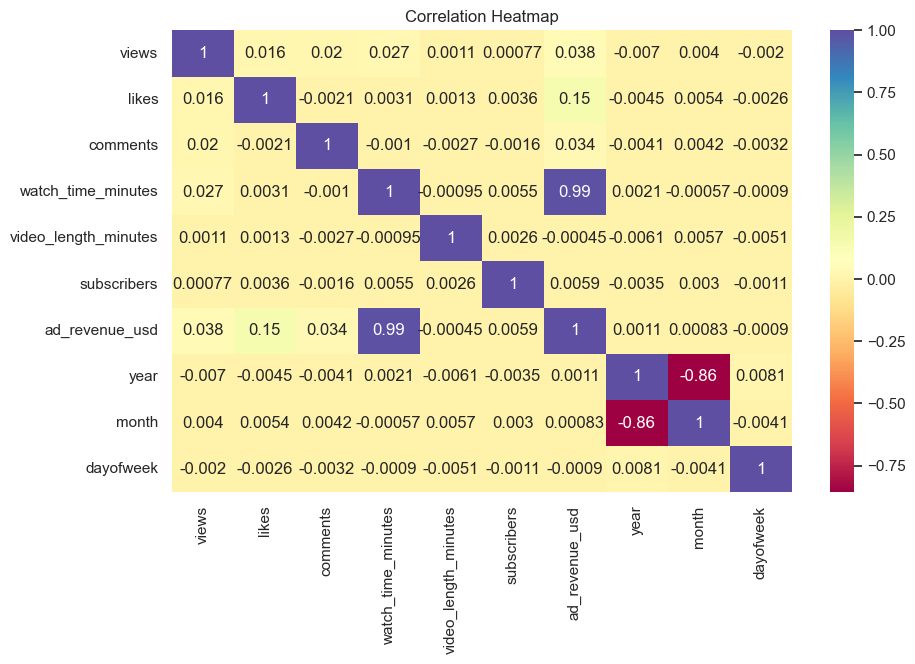

In [66]:
numeric_df = youtube_df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Spectral')
plt.title("Correlation Heatmap")
plt.show()

### Group analysis

In [67]:
corr_target=youtube_df.corr(numeric_only=True)['ad_revenue_usd'].sort_values(ascending=False)
corr_target

ad_revenue_usd          1.000000
watch_time_minutes      0.988874
likes                   0.146449
views                   0.038497
comments                0.034274
subscribers             0.005907
year                    0.001119
month                   0.000834
video_length_minutes   -0.000446
dayofweek              -0.000895
Name: ad_revenue_usd, dtype: float64

In [68]:
for col in categorical_cols:
    print(f"\n{col} ")
    print(youtube_df.groupby(col)['ad_revenue_usd'].mean().sort_values())


['category', 'device', 'country'] 
category       device  country
Education      TV      IN         246.969117
Entertainment  TV      IN         248.059989
Lifestyle      Mobile  US         248.097192
Music          Tablet  CA         248.226241
Lifestyle      Tablet  US         248.805485
                                     ...    
Gaming         Tablet  US         258.072410
               Mobile  CA         258.112824
                       IN         258.148367
Tech           TV      AU         258.176059
               Mobile  CA         258.476564
Name: ad_revenue_usd, Length: 144, dtype: float64


In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for col in ['category', 'device', 'country']:
    model = ols(f'ad_revenue_usd ~ C({col})', data=youtube_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\n---- {col} ----")
    print(anova_table)

# If p-value < 0.05, then the feature has a significant relationship with target.
# If p-value > 0.05, then it’s probably not useful.


---- category ----
                   sum_sq        df         F   PR(>F)
C(category)  4.219960e+04       5.0  2.198761  0.05151
Residual     4.698079e+08  122394.0       NaN      NaN

---- device ----
                 sum_sq        df         F    PR(>F)
C(device)  2.205625e+04       3.0  1.915308  0.124654
Residual   4.698281e+08  122396.0       NaN       NaN

---- country ----
                  sum_sq        df         F    PR(>F)
C(country)  7.548195e+03       5.0  0.393261  0.853786
Residual    4.698426e+08  122394.0       NaN       NaN


#### Data Cleaning & Preprocessing

In [70]:
# Drop duplicates (~2%)
df = youtube_df.drop_duplicates()

# Fill engagement (likes, comments) with 0
df['likes'] = df['likes'].fillna(0)
df['comments'] = df['comments'].fillna(0)

# Fill watch_time_minutes with median
df['watch_time_minutes'] = df['watch_time_minutes'].fillna(df['watch_time_minutes'].median())
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,year,month,dayofweek
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,2024,9,1
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,2024,9,6
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,2024,11,3
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,2025,1,1
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,2025,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,2024,12,5
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,2024,7,5
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,0.0,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,2024,6,0
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,2024,12,6


In [71]:
df.loc[
    (df['views'] == 0) & 
    (df['likes'] == 0) & 
    (df['comments'] == 0) & 
    (df['watch_time_minutes'] == 0), 
    'ad_revenue_usd'
] = 0.0

In [72]:
df.drop(['video_id', 'date'], axis=1, inplace=True)

### Feature Engineering

In [73]:
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']

In [74]:
df.drop(columns=['video_length_minutes' ,'month','year','dayofweek'],axis=1,inplace=True)

In [75]:
corr_target=df.corr(numeric_only=True)['ad_revenue_usd'].sort_values(ascending=False)
print(corr_target)

ad_revenue_usd        1.000000
watch_time_minutes    0.964052
engagement_rate       0.131231
likes                 0.128878
views                 0.037942
comments              0.028335
subscribers           0.005065
Name: ad_revenue_usd, dtype: float64


In [76]:
df

,views,likes,comments,watch_time_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate
0,9936,1221.0,320.0,26497.214184,228086,Entertainment,TV,IN,203.178237,0.155093
1,10017,642.0,346.0,15209.747445,736015,Gaming,Tablet,CA,140.880508,0.098632
2,10097,1979.0,187.0,57332.658498,240534,Education,TV,CA,360.134008,0.214519
3,10034,1191.0,242.0,31334.517771,434482,Entertainment,Mobile,UK,224.638261,0.142814
4,9889,1858.0,477.0,15665.666434,42030,Education,Mobile,CA,165.514388,0.236121
...,...,...,...,...,...,...,...,...,...,...
122395,9853,1673.0,147.0,42075.704885,210818,Education,Tablet,US,280.986396,0.184715
122396,10128,1709.0,63.0,57563.703040,878860,Music,Desktop,UK,354.612981,0.174961
122397,10267,700.0,0.0,27549.714659,576756,Tech,Tablet,CA,203.643106,0.068180
122398,10240,1616.0,106.0,56967.384382,585138,Music,Mobile,UK,351.525811,0.168164


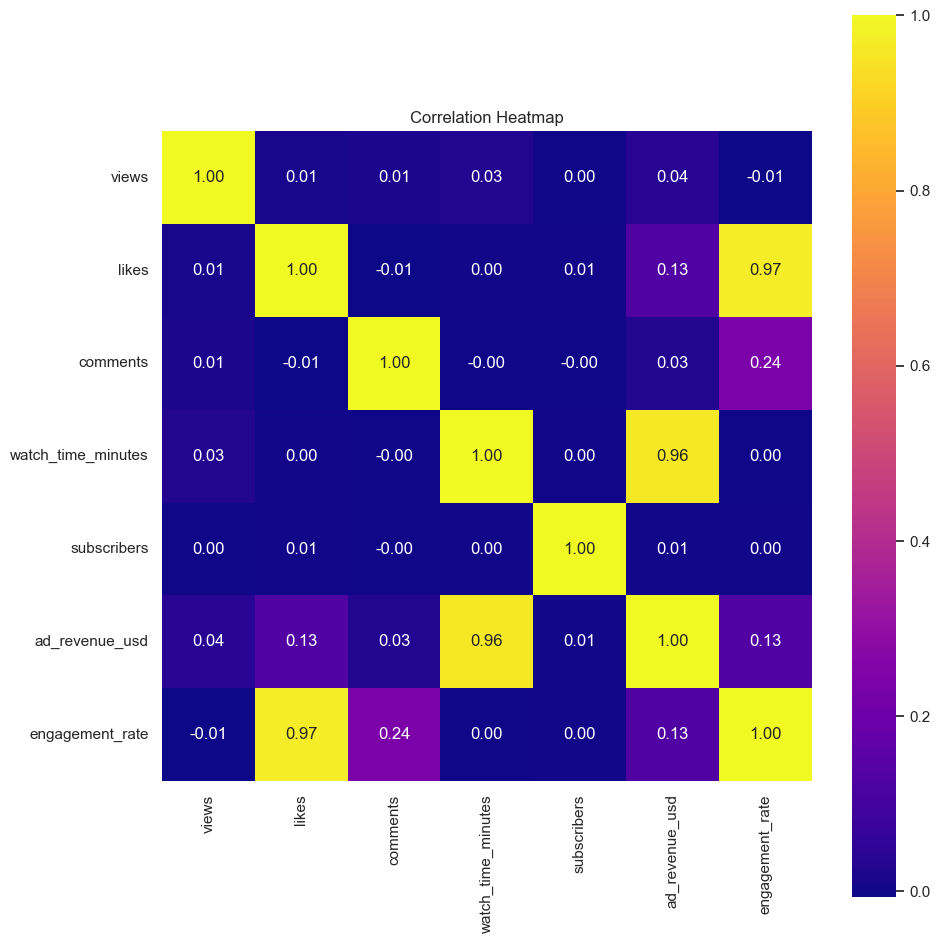

In [77]:
numerics_df = df.select_dtypes(include=['number'])
corr = numerics_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='plasma', fmt='.2f', square=True, cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [78]:
# 2. Define features and target
X=df.drop('ad_revenue_usd',axis=1) # independent variable / Features / X
Y=df['ad_revenue_usd'] # dependent variable / Target/Label / y

In [79]:
df=pd.concat([X,Y],axis=1)
df

,views,likes,comments,watch_time_minutes,subscribers,category,device,country,engagement_rate,ad_revenue_usd
0,9936,1221.0,320.0,26497.214184,228086,Entertainment,TV,IN,0.155093,203.178237
1,10017,642.0,346.0,15209.747445,736015,Gaming,Tablet,CA,0.098632,140.880508
2,10097,1979.0,187.0,57332.658498,240534,Education,TV,CA,0.214519,360.134008
3,10034,1191.0,242.0,31334.517771,434482,Entertainment,Mobile,UK,0.142814,224.638261
4,9889,1858.0,477.0,15665.666434,42030,Education,Mobile,CA,0.236121,165.514388
...,...,...,...,...,...,...,...,...,...,...
122395,9853,1673.0,147.0,42075.704885,210818,Education,Tablet,US,0.184715,280.986396
122396,10128,1709.0,63.0,57563.703040,878860,Music,Desktop,UK,0.174961,354.612981
122397,10267,700.0,0.0,27549.714659,576756,Tech,Tablet,CA,0.068180,203.643106
122398,10240,1616.0,106.0,56967.384382,585138,Music,Mobile,UK,0.168164,351.525811


In [82]:
df.to_csv("C:/Users/KIRUBA/OneDrive/Desktop/youtube/youtube_ad_revenue_dataset (1).csv", index=False)